In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy.optimize import fsolve
from utils import *

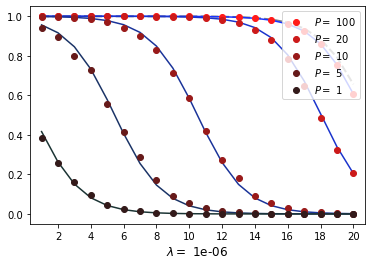

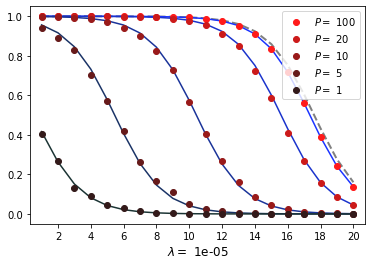

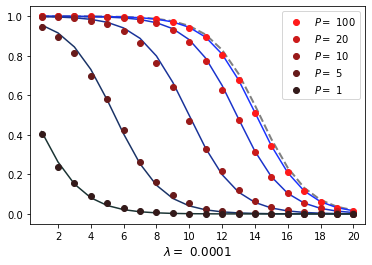

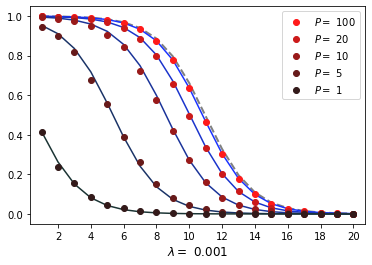

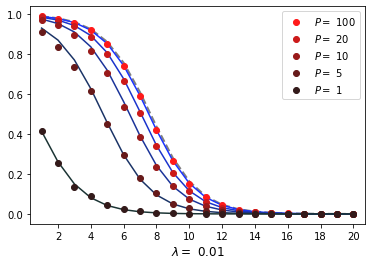

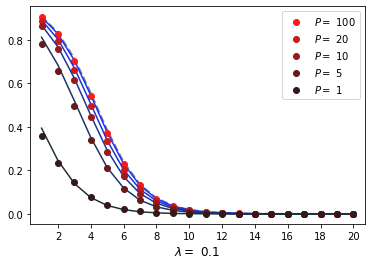

In [3]:
N = 20
P_lst = np.array([1, 5, 10, 20, 100]) 
lambd_lst = np.array([1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1])

D = 2 ** np.linspace(0, -N+1 , N)

num_trials = 500

for k in range(len(lambd_lst)):
    lambd = lambd_lst[k]
    tA_classic = np.zeros(N)
    for i in range(N):
        tA_classic[i] = D[i] / (D[i] + lambd)

    A_lst = []
    tA_effec_lst = []

    for p in range(len(P_lst)):
        P = int(P_lst[p])
        A = np.zeros((N, num_trials))
        for it in range(num_trials):
            W = np.random.normal(0, 1, size=(N,P))
            B = np.linalg.inv(np.matmul(np.matmul(W.T, np.diag(D)), W) / P + lambd * np.eye(P))
            for i in range(N):
                A[i, it] = D[i] * np.inner(W[i,:], np.matmul(B, W[i,:])) / P

        A_lst.append(np.mean(A, axis=1))

        tl, dtl = solve_eff_ridge(D, P, lambd)
        tA_effec = np.zeros(N)
        for i in range(N):
            tA_effec[i] = D[i] / (D[i] + tl)

        tA_effec_lst.append(tA_effec)
        tl = 0   

    #plt.plot(figsize=(38.40,21.60))
    plt.plot(np.linspace(1, 20, 20), tA_classic, color = 'grey', linestyle = 'dashed', linewidth = 2)

    for p in reversed(range(len(P_lst))):
        P = int(P_lst[p])
        label_txt = f"$P = $ {P}"
        plt.plot(np.linspace(1, 20, 20), tA_effec_lst[p], color = [0.1, 0.2, 0.2 * (p + 1)])   
        plt.plot(np.linspace(1, 20, 20), A_lst[p], 'o', color= [0.2 * (p + 1), 0.1, 0.1], markersize = 6, label = label_txt)

    title_txt = f"$\lambda = $ {lambd}"
    # save_txt = f"eigsA{len(lambd_lst) - k}.pdf"
    plt.title(title_txt, y = -0.17)
    plt.legend(loc = 'upper right')
    plt.xticks(np.linspace(2, 20, 10))
    plt.xlim(0.3, 20.7)
    # plt.savefig(save_txt, dip = 2000)
    plt.show()